 <h1><center>Car Price Prediction</center></h1>

In [96]:
import pandas as pd
import numpy as np
import seaborn as sea 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics 

In [2]:
car_details = pd.read_csv("./data/Car Prediction/car data.csv")
car_details.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
car_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
car_details.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
car_details.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
print(car_details['Fuel_Type'].value_counts())
print(car_details['Seller_Type'].value_counts())
print(car_details['Transmission'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [7]:
car_details = car_details.drop('Car_Name',axis=1)
car_details.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
car_details['year_old'] = 2022 - car_details.Year
car_details.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,year_old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [9]:
car_details.drop('Year', axis=1,inplace=True)


In [10]:
car_details.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,year_old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [11]:
car_details = pd.get_dummies(car_details,drop_first = True)

In [12]:
car_details.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,year_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


# EDA

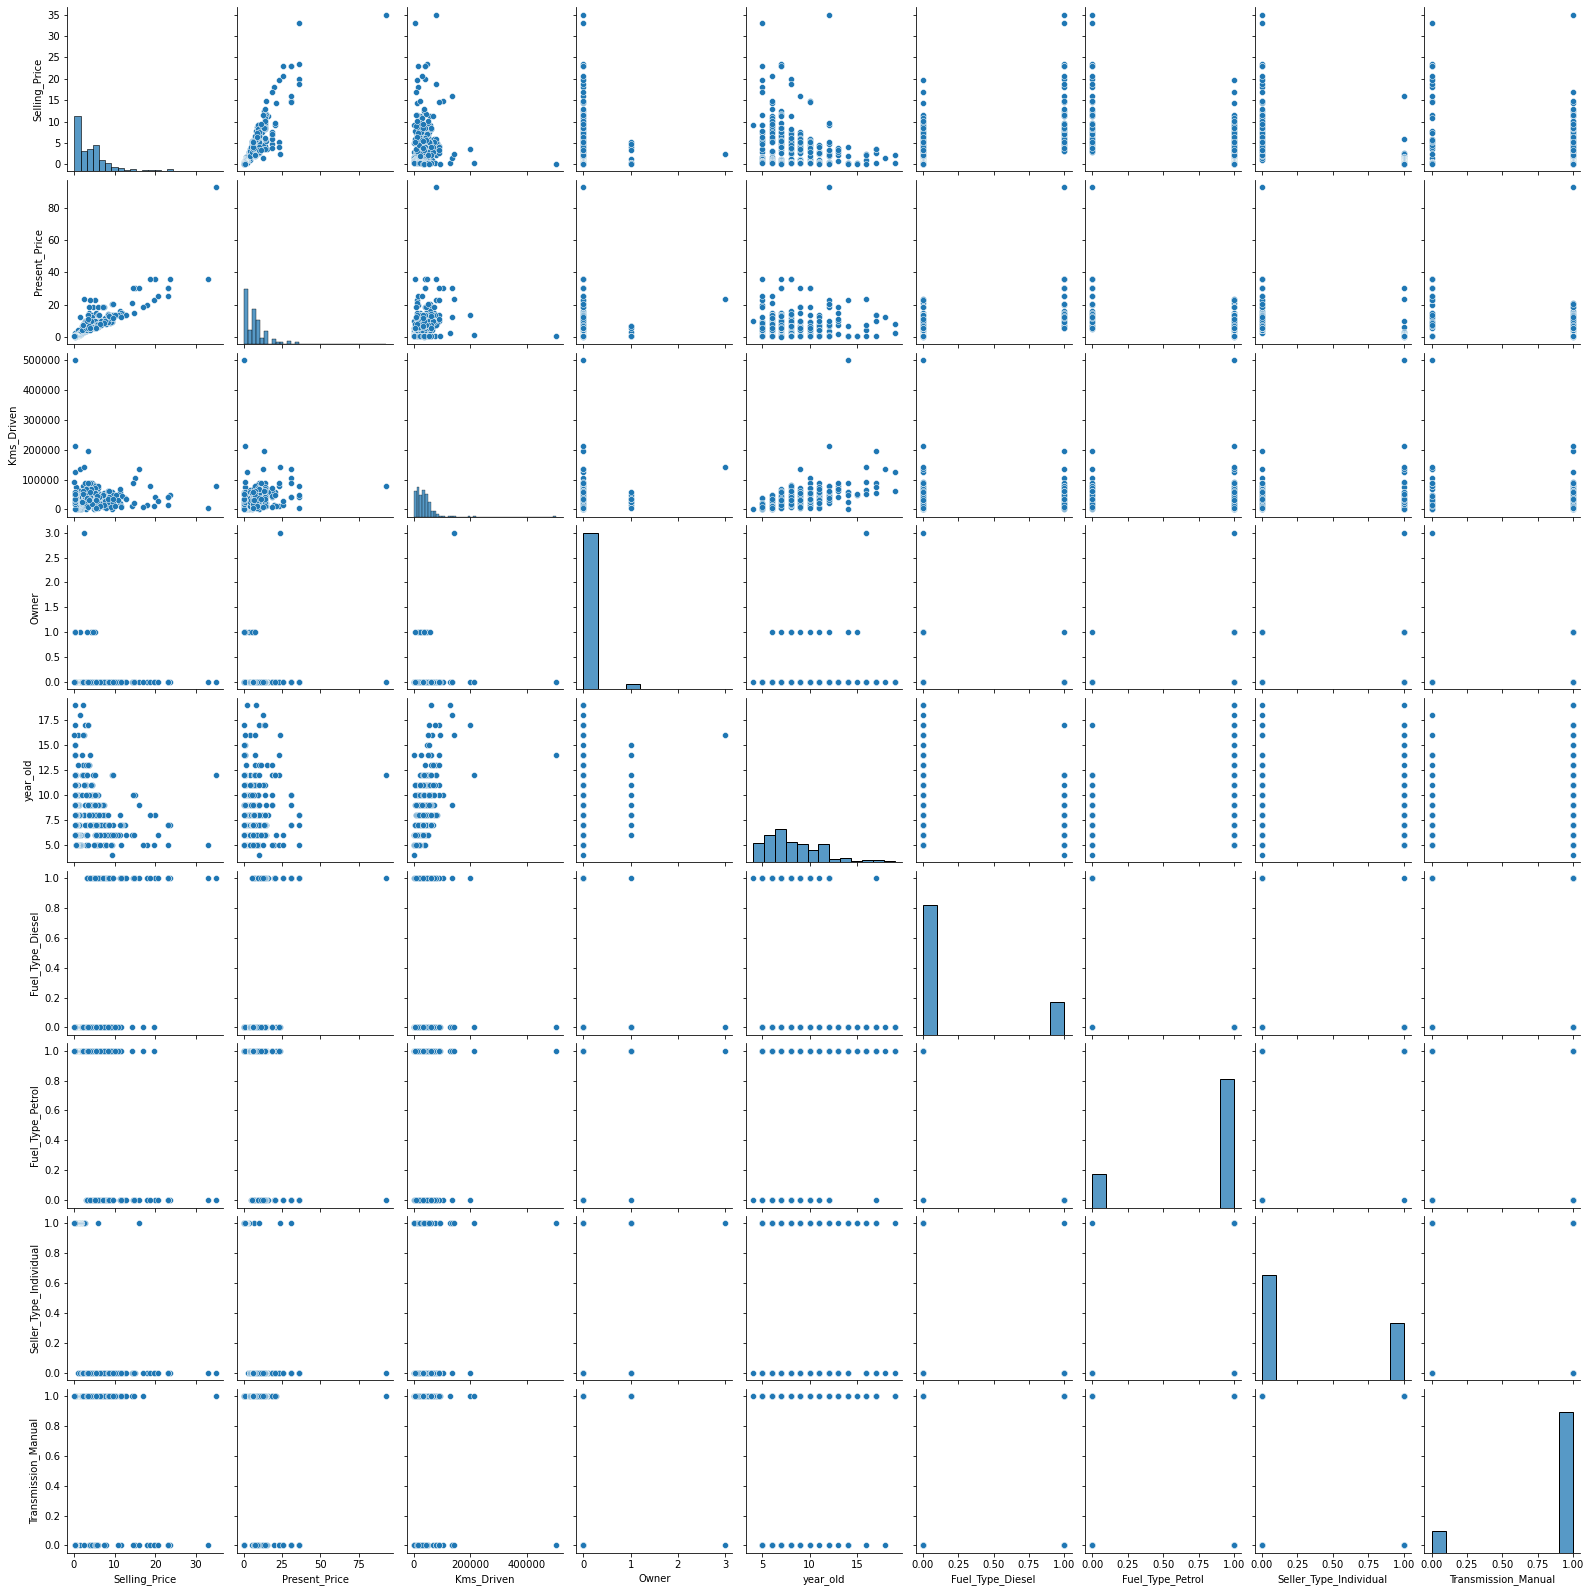

In [13]:
sea.pairplot(car_details)

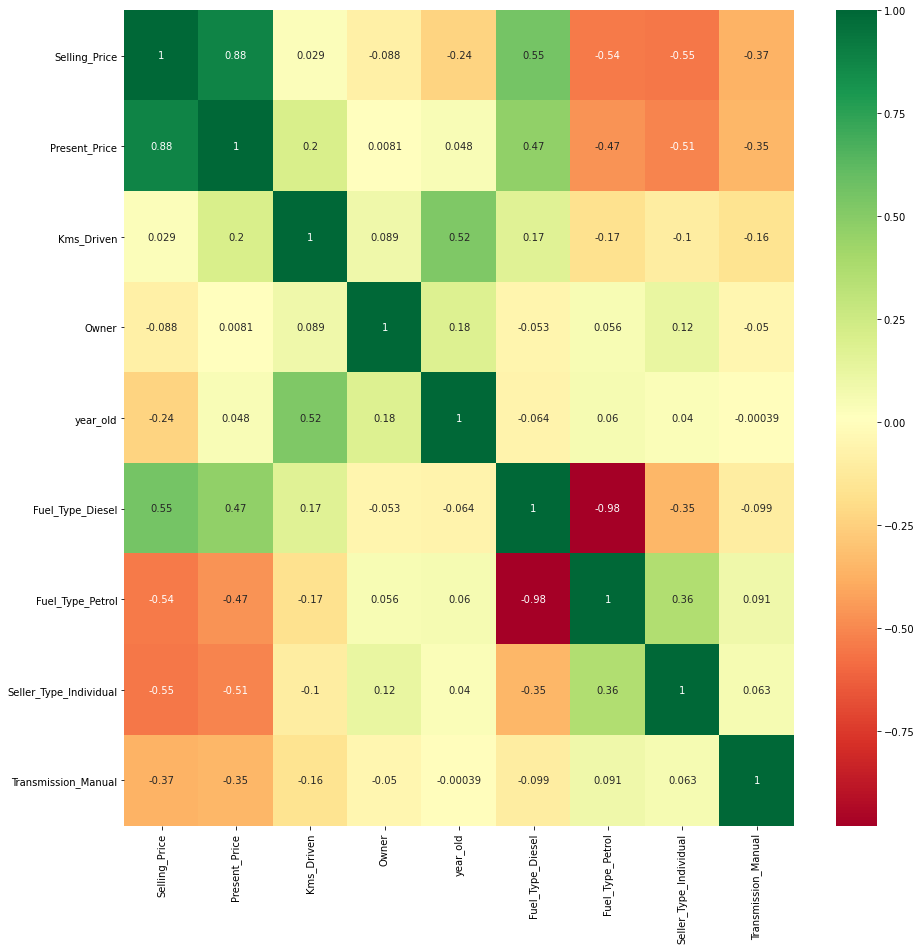

In [14]:
corrmat = car_details.corr()
top_corr_feature = corrmat.index
plt.figure(figsize=(15,15))
g = sea.heatmap(car_details[top_corr_feature].corr(),annot=True,cmap="RdYlGn")

In [15]:
car_details.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,year_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [16]:
x = car_details.drop('Selling_Price',axis =1)
y = car_details['Selling_Price']
print(x.shape)
print(y.shape)

(301, 8)
(301,)


In [17]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [18]:
model.feature_importances_

array([0.37241417, 0.03700795, 0.00041819, 0.07862306, 0.23234904,
       0.01350211, 0.12414913, 0.14153635])

<AxesSubplot:>

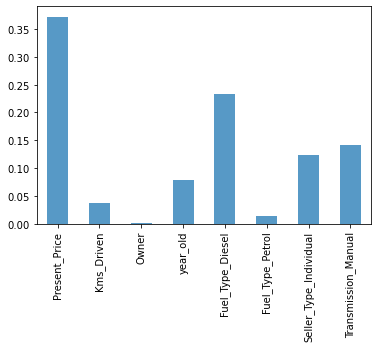

In [19]:
pd.Series(model.feature_importances_,index=x.columns).plot(kind='bar',alpha=0.75,rot=90)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2 , random_state = 0)

In [21]:
LR_model = LinearRegression()
LR_model.fit(x_train,y_train)
training_data_pred = LR_model.predict(x_train)
LR_model.score(x_train,y_train)

0.8734200741252952

In [22]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5,test_size = 0.2 , random_state = 0)

In [23]:
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.9144343 , 0.81157191, 0.82958652, 0.84584462, 0.85555828])

## Finding Best model using RandomizedSearchCV

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [69]:
def model_selections(x,y):
    model_selection = {
        'Linear_Regression':{
            'model':LinearRegression(),
            'params' : {
                'normalize':[True,False]
            }
        },
        
        'Decision_Tree':{
            'model':DecisionTreeRegressor(),
            'params' : {
                'criterion':['mse','friedman_mse','mae'],
                'splitter':['best','random'],
                'max_depth': [x for x in range(5,100,5)],
                'min_samples_leaf':[1,2,5,10]
            }
        },
        'Random_forest':{
            'model':RandomForestRegressor(),
            'params' : {
                'n_estimators':[x for x in range(20,800,20)],
                'max_features':['auto','sqrt'],
                'max_depth': [x for x in range(5,65,5)],
                'min_samples_split':[2,5,10,15,100],
                'min_samples_leaf':[1,2,5,10]
            }
        }
    }
    
    score = []
    
    cv = ShuffleSplit(n_splits = 5,test_size = 0.2 , random_state = 0)
    for name , config in model_selection.items():
        rs = RandomizedSearchCV( config['model'], config['params'], cv=cv, return_train_score = False , n_iter = 5)
        rs.fit(x_train,y_train)
        score.append({
            'model':name,
            "best_score":rs.best_score_,
            "best_params" :rs.best_params_
        })
    result = pd.DataFrame(score, columns = ['model','best_score','best_params'])    
    print(result.best_params.tolist())
    return result

In [70]:
model_selection(x,y)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=5. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[{'normalize': False}, {'splitter': 'best', 'min_samples_leaf': 2, 'max_depth': 15, 'criterion': 'mse'}, {'n_estimators': 80, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30}]


,model,best_score,best_params
0,Linear_Regression,0.850996,{'normalize': False}
1,Decision_Tree,0.941712,"{'splitter': 'best', 'min_samples_leaf': 2, 'm..."
2,Random_forest,0.943475,"{'n_estimators': 80, 'min_samples_split': 2, '..."


### Decision Tree Regressor

In [73]:
DTR_model = DecisionTreeRegressor(splitter= 'best', min_samples_leaf= 2, max_depth= 15, criterion= 'mse')
DTR_model.fit(x_train,y_train)
DTR_model.score(x_test,y_test)


0.943975912524015

In [78]:
cross_val_score(DecisionTreeRegressor(splitter= 'best', min_samples_leaf= 2, max_depth= 15, criterion= 'mse'),x,y,cv=cv)

array([0.95686506, 0.91358071, 0.94539726, 0.74779757, 0.92770516])

### Random Forest Regressor

In [80]:
RFR_model = RandomForestRegressor(n_estimators= 80, min_samples_split = 2, min_samples_leaf= 1, max_features = 'auto', max_depth = 30)
RFR_model.fit(x_train,y_train)
RFR_model.score(x_test,y_test)

0.9563468569109036

In [81]:
cross_val_score(RandomForestRegressor(n_estimators= 80, min_samples_split = 2, min_samples_leaf= 1, max_features = 'auto', max_depth = 30),x,y,cv=cv)

array([0.95003603, 0.91421163, 0.96772643, 0.85276975, 0.95904075])

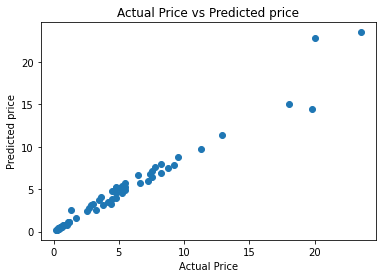

In [84]:
prediction_val = RFR_model.predict(x_test)
plt.xlabel("Actual Price")
plt.ylabel('Predicted price')
plt.title('Actual Price vs Predicted price')
plt.scatter(y_test,prediction_val)

In [95]:
input_data = (9.94,15000,0,7,1,0,1,0)
input_data_array = np.asarray(input_data)
input_data_reshape = input_data_array.reshape(1,-1)
prediction =  RFR_model.predict(input_data_reshape)
prediction[0]

7.383625